In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import math
pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 101)
np.random.seed(123)
from sklearn.metrics import accuracy_score
from sklearn import linear_model, metrics, model_selection, ensemble

In [2]:
basic = pd.read_csv('./data/PBP - 2016 - Week 1.csv')
df3 = pd.read_csv('./data/PBP - 2016 - Week 3.csv')
df4 = pd.read_csv('./data/PBP - 2016 - Week 4.csv')
df5 = pd.read_csv('./data/PBP - 2016 - Week 5.csv')
df6 = pd.read_csv('./data/PBP - 2016 - Week 6.csv')
df7 = pd.read_csv('./data/PBP - 2016 - Week 7.csv')
df8 = pd.read_csv('./data/PBP - 2016 - Week 8.csv')
basic = pd.concat([basic, df3, df4, df5, df6, df7, df8])
offense_stats = pd.read_csv('./data/Offense Stats 2016.csv')
defense_stats = pd.read_csv('./data/Defense Stats 2016.csv')

In [3]:
statsJoin = basic.join(offense_stats.set_index('School'), on='offenseTeam', rsuffix='_offense_stats')
statsJoin = statsJoin.join(defense_stats.set_index('School'), on='defenseTeam', rsuffix='_defense_stats')
statsJoin = statsJoin.dropna()
statsJoin

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,playIndex,offenseId,offenseTeam,offenseAbbr,defenseId,defenseTeam,defenseAbbr,homeScore,awayScore,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description,Rk,G,Pts,Passing Completion,Pass Attemps,completion percentage,passing yards,Passing Touchdowns,Rush Attempts,Rushing yards,rush average,Rush Touchdowns,Total Offense Plays,Total yards,total yards per play,First down by pass,First down by rush,Number of Penalties,Penalty yards,Rk_defense_stats,Points Allowed,opponent completions,opponent attempts,opponent completion percentage,opponent passing yards,opponent passing touchdowns,opponent rush attempts,opponent rush yards,opponent average rush,opponent rush touchdowns,total opponent plays,total opponent yards,opponent total yards per play,opponent pass first downs,opponent rush first downs
374,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,0,349,Army,ARMY,218,Temple,TEM,0,0,1,15:00,2016-09-03T06:02:56Z,Kickoff,1,10,65,0,25,Mitchell Howard kickoff for 65 yds for a touch...,59.0,13.0,29.9,4.2,9.5,43.9,74.4,0.5,60.5,339.6,5.6,3.5,70.0,414.0,5.9,2.9,17.8,4.8,42.2,11.0,18.4,13.0,24.4,53.2,152.1,0.9,36.4,130.5,3.6,1.2,60.8,282.6,4.6,6.9,7.2
375,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,1,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,1,10,25,6,31,Ryquell Armstead run for 6 yds to the Temp 31,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
376,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,2,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Rush,2,4,31,2,33,Ryquell Armstead run for 2 yds to the Temp 33,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
377,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,3,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Pass Reception,3,2,33,7,40,Phillip Walker pass complete to Marshall Ellic...,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
378,400868910,2016,1,218,Temple,TEM,349,Army,ARMY,0,4,218,Temple,TEM,349,Army,ARMY,0,0,1,15:00,2016-09-03T06:02:56Z,Pass Reception,1,10,40,7,47,Phillip Walker pass complete to Marshall Ellic...,43.0,14.0,32.4,16.6,28.8,57.6,237.4,1.6,40.1,176.4,4.4,2.2,68.9,413.8,6.0,9.7,9.9,5.4,43.1,15.0,19.8,14.7,26.0,56.5,170.2,1.1,31.2,121.2,3.9,1.3,57.2,291.5,5.1,7.0,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,7,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Penalty,1,15,60,-5,65,"UL LAFAYETTE Penalty, false start (-5 Yards) t...",109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10286,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,8,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Rush,1,20,65,19,46,Jordan Davis run for 19 yds to the TexSt 46,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2,125.0,41.1,20.8,31.1,66.8,248.8,2.3,45.0,222.3,4.9,2.8,76.1,471.1,6.2,10.2,11.5
10287,400869834,2016,8,326,Texas State,TXST,309,Louisiana,ULL,21,9,309,Louisiana,ULL,326,Texas State,TXST,3,27,4,6:27,2016-10-23T08:53:13Z,Rush,2,1,46,3,43,Raymond Calais run for 3 yds to the TexSt 43 f...,109.0,13.0,23.6,15.7,26.4,59.5,178.2,0.9,44.9,179.4,4.0,1.6,71.3,357.6,5.0,7.6,10.3,7.2,58.2

In [4]:
statsJoin = statsJoin.replace('Pass Incompletion', 'Pass')
statsJoin = statsJoin.replace('Pass Reception', 'Pass')
statsJoin = statsJoin.replace('Passing Touchdown', 'Pass')
statsJoin = statsJoin.replace('Rushing Touchdown', 'Rush')
statsJoin = statsJoin.replace('Pass Interception Return', 'Pass')
statsJoin = statsJoin.replace('Sack', 'Pass')
statsJoin['type'].unique()

array(['Kickoff', 'Rush', 'Pass', 'Penalty', 'Field Goal Missed',
       'End Period', 'Punt', 'Timeout', 'Field Goal Good',
       'Fumble Recovery (Own)', 'End of Half', 'End of Game',
       'Blocked Field Goal', 'Defensive 2pt Conversion',
       'Kickoff Return (Offense)', 'Fumble Recovery (Opponent)',
       'Interception Return Touchdown', 'Safety',
       'Kickoff Return Touchdown', 'Punt Return Touchdown',
       'Blocked Punt', 'Fumble Return Touchdown', 'Coin Toss',
       'Missed Field Goal Return'], dtype=object)

In [5]:
new_df = statsJoin[(statsJoin.type == 'Pass') | (statsJoin.type == 'Rush')]

In [6]:
new_df.columns

Index(['gameId', 'year', 'week', 'homeId', 'homeTeam', 'homeAbbr', 'awayId',
       'awayTeam', 'awayAbbr', 'driveIndex', 'playIndex', 'offenseId',
       'offenseTeam', 'offenseAbbr', 'defenseId', 'defenseTeam', 'defenseAbbr',
       'homeScore', 'awayScore', 'quarter', 'clock', 'wallclock', 'type',
       'down', 'distance', 'yardLine', 'yardsGained', 'endYardLine',
       'description', 'Rk', 'G', 'Pts', 'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'Total Offense Plays', 'Total yards', 'total yards per play',
       'First down by pass', 'First down by rush', 'Number of Penalties',
       'Penalty yards', 'Rk_defense_stats', 'Points Allowed',
       'opponent completions', 'opponent attempts',
       'opponent completion percentage', 'opponent passing yards',
       'opponent passing touchdowns', 'opponent rush attempts',
       'opponent

In [32]:
features = new_df[[
       'homeScore', 'awayScore', 'quarter',
       'down', 'distance', 'yardLine',
         'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'First down by pass', 'First down by rush',
       'opponent completions', 'opponent attempts',
       'opponent completion percentage', 'opponent passing yards',
       'opponent passing touchdowns', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns']]

In [33]:
labels = new_df['type']
labels = labels.replace('Rush', 0)
labels = labels.replace('Pass', 1)

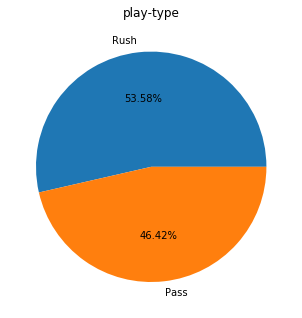

In [38]:
rel_freq = new_df['type'].value_counts()

plt.pie(rel_freq, labels = ('Rush', 'Pass'), autopct='%.2f%%')
plt.title("play-type")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [34]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.005)

gbr.fit(features, labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [35]:
prediction = gbr.predict(features)

accuracy = accuracy_score(labels, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 63.59%


In [36]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6157017686412413

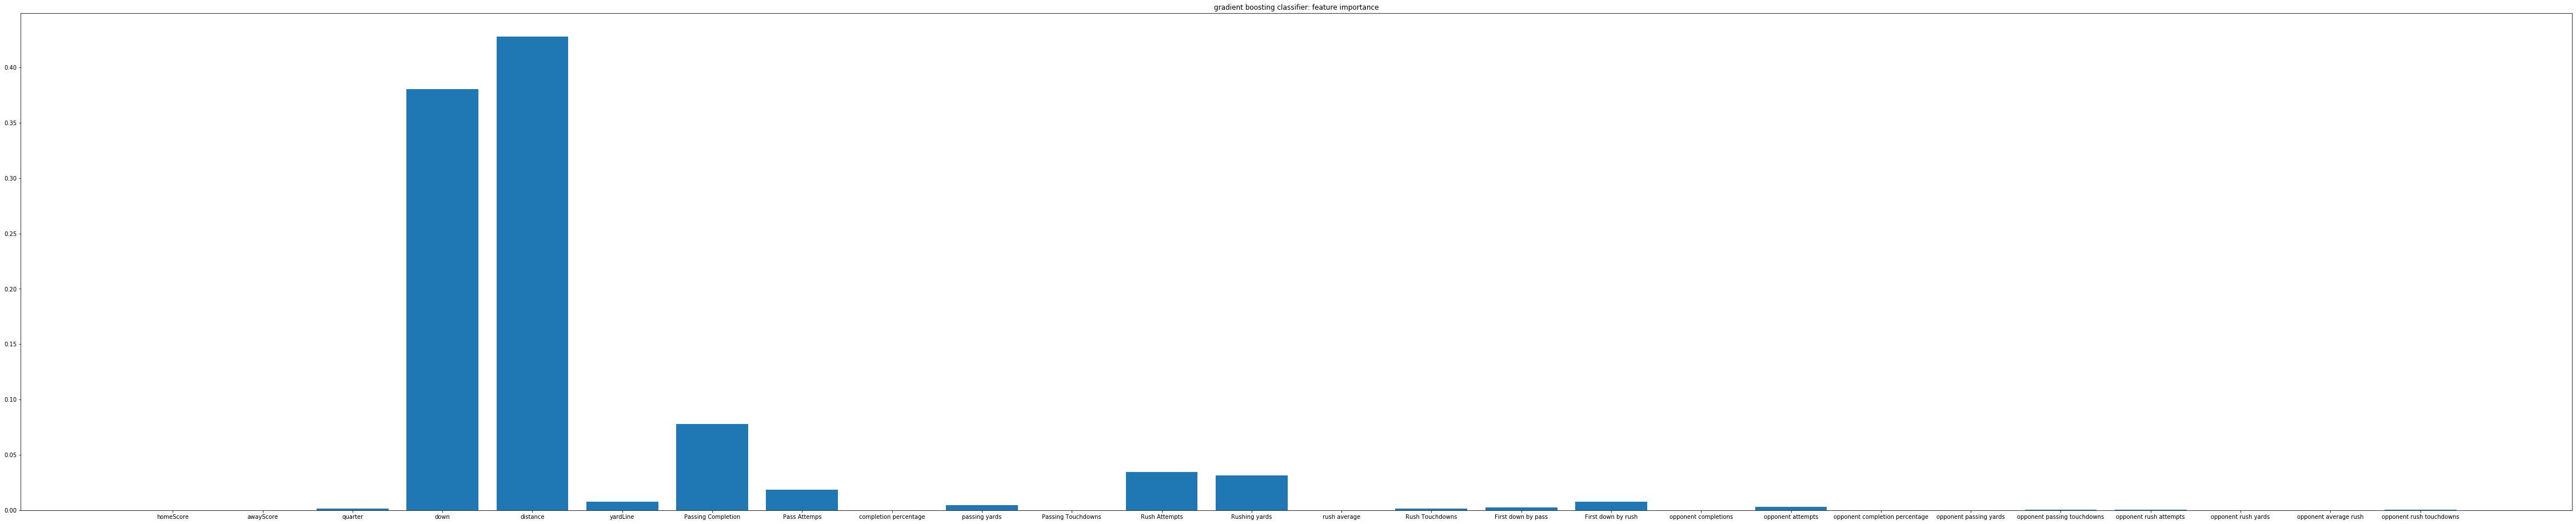

In [37]:
features = [
       'homeScore', 'awayScore', 'quarter',
       'down', 'distance', 'yardLine',
         'Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'First down by pass', 'First down by rush',
       'opponent completions', 'opponent attempts',
       'opponent completion percentage', 'opponent passing yards',
       'opponent passing touchdowns', 'opponent rush attempts',
       'opponent rush yards', 'opponent average rush',
       'opponent rush touchdowns']
feature_importance = gbr.feature_importances_.tolist()
fig, ax = plt.subplots(1,1,figsize=(80,16))
plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

In [49]:
disp = metrics.confusion_matrix(labels, prediction).ravel()

disp

array([14126,  1596,  9087,  4535])